0 - Define the goal

1 - Import the data

2 - Clean the data

3 - Split the data into training and test set

4 - Create a model (usually from sklearn)

5 - Check the output using the test set

6 - Improve (extra data, different algorithm)

Useful packages:
- numpy
- pandas 
- sklearn
we will use jupyter notebooks for this project
really useful for ml/data science
kaggle has lots of free datasets.



In [2]:
import pandas as pd
fifa_df = pd.read_csv('data.csv')
fifa_df.shape

(18207, 89)

In [5]:
fifa_df.describe()

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '€165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '€143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '€165K']],
      dtype=object)

In [ ]:
fifa_df.values

Data cleaning exercise.

Using the fifa 2019 dataset, we want to find what players are a good deal, i.e., biggest gap between wage and value. 

In [12]:
fifa_df1 = pd.DataFrame(fifa_df, columns=['Name', 'Wage', 'Value'])
# we need to convert wage and value into integers
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
fifa_df1['Wage'] = fifa_df1['Wage'].replace('[\€,]','',regex=True)
fifa_df1['Value'] = fifa_df1['Value'].replace('[\€,]','',regex=True)
fifa_df1['Wage'] = fifa_df1['Wage'].apply(value_to_float)
fifa_df1['Value'] = fifa_df1['Value'].apply(value_to_float)
fifa_df1['difference'] = fifa_df1['Value'] - fifa_df1['Wage']
fifa_df1.sort_values('difference', ascending=False, inplace=True)
print(fifa_df1)

               Name      Wage        Value   difference
2         Neymar Jr  290000.0  118500000.0  118210000.0
0          L. Messi  565000.0  110500000.0  109935000.0
4      K. De Bruyne  355000.0  102000000.0  101645000.0
5         E. Hazard  340000.0   93000000.0   92660000.0
15        P. Dybala  205000.0   89000000.0   88795000.0
...             ...       ...          ...          ...
17752   S. Phillips    1000.0          0.0      -1000.0
12192  H. Sulaimani    3000.0          0.0      -3000.0
3550    S. Nakamura    4000.0          0.0      -4000.0
4228       B. Nivet    5000.0          0.0      -5000.0
864          Hilton   18000.0          0.0     -18000.0

[18207 rows x 4 columns]


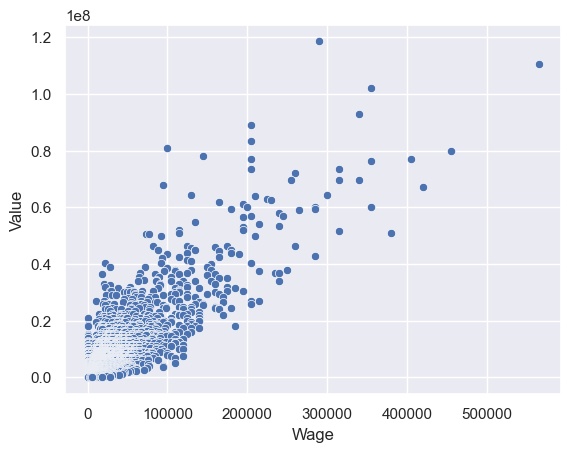

In [13]:
import seaborn as sns
sns.set()
graph = sns.scatterplot(x='Wage', y='Value', data=fifa_df1)

In [22]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
# bokeh has cool interactive html plotting 
# e.g., can hover on 
TOOLTIPS =HoverTool(tooltips=[
                ("index", "$index"),
            ("(Wage,Value)", "(@Wage, @Value)"),
            ("Name", "@Name")])
p = figure(title='Soccer 2019', x_axis_label='Value', y_axis_label='Wage', 
           outer_width=700, outer_height=700,
           tools=[TOOLTIPS])
p.circle('Value', 'Wage', size=10, source=fifa_df1)
show(p)